# Image classification

## Import packages

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

Import Tensorflow and the Keras classes needed to construct our model.

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

import os
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
train_local_zip = '/content/drive/MyDrive/lulc-tra-val.zip'
zip_ref = zipfile.ZipFile(train_local_zip, 'r')
zip_ref.extractall('/content/sample_data/lulc-tra-val')

#val_local_zip = './validation-horse-or-human.zip'
#zip_ref = zipfile.ZipFile(val_local_zip, 'r')
#zip_ref.extractall('/tmp/validation')

zip_ref.close()

In [13]:
PATH = '/content/sample_data/lulc-tra-val/lulc-classificatio'

After extracting its contents, assign variables with the proper file path for the training and validation set.

In [14]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [15]:
# Directory with training horse pictures
train_BarrenLands_dir = os.path.join(train_dir, '1_BarrenLands___jpeg')
# Directory with training humans pictures
train_MossAndLichen_dir = os.path.join(train_dir, '2_MossAndLichen_jpeg')
# Directory with training humans pictures
train_Grasslands_dir = os.path.join(train_dir, '3_Grasslands____jpeg')
# Directory with training humans pictures
train_ShrublandOpen_dir = os.path.join(train_dir, '4_ShrublandOpen_jpeg')
# Directory with training humans pictures
train_SrublandClose_dir = os.path.join(train_dir, '5_SrublandClose_jpeg')
# Directory with training humans pictures
train_ForestsOpDeBr_dir = os.path.join(train_dir, '6_ForestsOpDeBr_jpeg')
# Directory with training humans pictures
train_ForestsClDeBr_dir = os.path.join(train_dir, '7_ForestsClDeBr_jpeg')
# Directory with training humans pictures
train_ForestsDeDeBr_dir = os.path.join(train_dir, '8_ForestsDeDeBr_jpeg')
# Directory with training humans pictures
train_ForestsOpDeNe_dir = os.path.join(train_dir, '9_ForestsOpDeNe_jpeg')
# Directory with training humans pictures
train_ForestsClDeNe_dir = os.path.join(train_dir, '10_ForestsClDeNe_jpeg')
# Directory with training humans pictures
train_ForestsDeDeNe_dir = os.path.join(train_dir, '11_ForestsDeDeNe_jpeg')
# Directory with training humans pictures
train_ForestsOpEvBr_dir = os.path.join(train_dir, '12_ForestsOpEvBr_jpeg')
# Directory with training humans pictures
train_ForestsClEvBr_dir = os.path.join(train_dir, '13_ForestsClEvBr_jpeg')
# Directory with training humans pictures
train_ForestsDeEvBr_dir = os.path.join(train_dir, '14_ForestsDeEvBr_jpeg')
# Directory with training humans pictures
train_ForestsOpEvNe_dir = os.path.join(train_dir, '15_ForestsOpEvNe_jpeg')
# Directory with training humans pictures
train_ForestsClEvNe_dir = os.path.join(train_dir, '16_ForestsClEvNe_jpeg')
# Directory with training humans pictures
train_ForestsDeEvNe_dir = os.path.join(train_dir, '17_ForestsDeEvNe_jpeg')
# Directory with training humans pictures
train_WetlandMangro_dir = os.path.join(train_dir, '18_WetlandMangro_jpeg')
# Directory with training humans pictures
train_WetlandSwamps_dir = os.path.join(train_dir, '19_WetlandSwamps_jpeg')
# Directory with training humans pictures
train_WetlandMarshl_dir = os.path.join(train_dir, '20_WetlandMarshl_jpeg')
# Directory with training humans pictures
train_WaterBodyMari_dir = os.path.join(train_dir, '21_WaterBodyMari_jpeg')
# Directory with training humans pictures
train_WaterBodyCont_dir = os.path.join(train_dir, '22_WaterBodyCont_jpeg')
# Directory with training humans pictures
train_PermanentSnow_dir = os.path.join(train_dir, '23_PermanentSnow_jpeg')
# Directory with training humans pictures
train_CropSeasWater_dir = os.path.join(train_dir, '24_CropSeasWater_jpeg')
# Directory with training humans pictures
train_CropCereaIrri_dir = os.path.join(train_dir, '25_CropCereaIrri_jpeg')
# Directory with training humans pictures
train_CropCereaRain_dir = os.path.join(train_dir, '26_CropCereaRain_jpeg')
# Directory with training humans pictures
train_CropBroadIrri_dir = os.path.join(train_dir, '27_CropBroadIrri_jpeg')
# Directory with training humans pictures
train_CropBroadRain_dir = os.path.join(train_dir, '28_CropBroadRain_jpeg')
# Directory with training humans pictures
train_UrbanBlUpArea_dir = os.path.join(train_dir, '29_UrbanBlUpArea_jpeg')

Sample BarrenLands image:


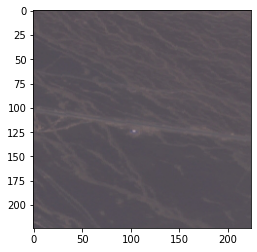

In [16]:
print("Sample BarrenLands image:")
plt.imshow(load_img(f"{os.path.join(train_BarrenLands_dir, os.listdir(train_BarrenLands_dir)[0])}"))
plt.show()

In [17]:
# Directory with validationing horse pictures
validation_BarrenLands_dir = os.path.join(validation_dir, '1_BarrenLands___jpeg')
# Directory with validationing humans pictures
validation_MossAndLichen_dir = os.path.join(validation_dir, '2_MossAndLichen_jpeg')
# Directory with validationing humans pictures
validation_Grasslands_dir = os.path.join(validation_dir, '3_Grasslands____jpeg')
# Directory with validationing humans pictures
validation_ShrublandOpen_dir = os.path.join(validation_dir, '4_ShrublandOpen_jpeg')
# Directory with validationing humans pictures
validation_SrublandClose_dir = os.path.join(validation_dir, '5_SrublandClose_jpeg')
# Directory with validationing humans pictures
validation_ForestsOpDeBr_dir = os.path.join(validation_dir, '6_ForestsOpDeBr_jpeg')
# Directory with validationing humans pictures
validation_ForestsClDeBr_dir = os.path.join(validation_dir, '7_ForestsClDeBr_jpeg')
# Directory with validationing humans pictures
validation_ForestsDeDeBr_dir = os.path.join(validation_dir, '8_ForestsDeDeBr_jpeg')
# Directory with validationing humans pictures
validation_ForestsOpDeNe_dir = os.path.join(validation_dir, '9_ForestsOpDeNe_jpeg')
# Directory with validationing humans pictures
validation_ForestsClDeNe_dir = os.path.join(validation_dir, '10_ForestsClDeNe_jpeg')
# Directory with validationing humans pictures
validation_ForestsDeDeNe_dir = os.path.join(validation_dir, '11_ForestsDeDeNe_jpeg')
# Directory with validationing humans pictures
validation_ForestsOpEvBr_dir = os.path.join(validation_dir, '12_ForestsOpEvBr_jpeg')
# Directory with validationing humans pictures
validation_ForestsClEvBr_dir = os.path.join(validation_dir, '13_ForestsClEvBr_jpeg')
# Directory with validationing humans pictures
validation_ForestsDeEvBr_dir = os.path.join(validation_dir, '14_ForestsDeEvBr_jpeg')
# Directory with validationing humans pictures
validation_ForestsOpEvNe_dir = os.path.join(validation_dir, '15_ForestsOpEvNe_jpeg')
# Directory with validationing humans pictures
validation_ForestsClEvNe_dir = os.path.join(validation_dir, '16_ForestsClEvNe_jpeg')
# Directory with validationing humans pictures
validation_ForestsDeEvNe_dir = os.path.join(validation_dir, '17_ForestsDeEvNe_jpeg')
# Directory with validationing humans pictures
validation_WetlandMangro_dir = os.path.join(validation_dir, '18_WetlandMangro_jpeg')
# Directory with validationing humans pictures
validation_WetlandSwamps_dir = os.path.join(validation_dir, '19_WetlandSwamps_jpeg')
# Directory with validationing humans pictures
validation_WetlandMarshl_dir = os.path.join(validation_dir, '20_WetlandMarshl_jpeg')
# Directory with validationing humans pictures
validation_WaterBodyMari_dir = os.path.join(validation_dir, '21_WaterBodyMari_jpeg')
# Directory with validationing humans pictures
validation_WaterBodyCont_dir = os.path.join(validation_dir, '22_WaterBodyCont_jpeg')
# Directory with validationing humans pictures
validation_PermanentSnow_dir = os.path.join(validation_dir, '23_PermanentSnow_jpeg')
# Directory with validationing humans pictures
validation_CropSeasWater_dir = os.path.join(validation_dir, '24_CropSeasWater_jpeg')
# Directory with validationing humans pictures
validation_CropCereaIrri_dir = os.path.join(validation_dir, '25_CropCereaIrri_jpeg')
# Directory with validationing humans pictures
validation_CropCereaRain_dir = os.path.join(validation_dir, '26_CropCereaRain_jpeg')
# Directory with validationing humans pictures
validation_CropBroadIrri_dir = os.path.join(validation_dir, '27_CropBroadIrri_jpeg')
# Directory with validationing humans pictures
validation_CropBroadRain_dir = os.path.join(validation_dir, '28_CropBroadRain_jpeg')
# Directory with validationing humans pictures
validation_UrbanBlUpArea_dir = os.path.join(validation_dir, '29_UrbanBlUpArea_jpeg')

Sample BarrenLands image:


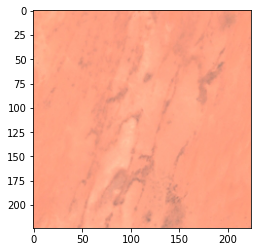

In [18]:
print("Sample BarrenLands image:")
plt.imshow(load_img(f"{os.path.join(validation_BarrenLands_dir, os.listdir(validation_BarrenLands_dir)[0])}"))
plt.show()

### Understand the data

In [19]:
num_barren_tr = len(os.listdir(train_BarrenLands_dir))
num_barren_val = len(os.listdir(validation_BarrenLands_dir))

print('total training barren images:', num_barren_tr)
print('total validation barren images:', num_barren_val)

total training barren images: 283
total validation barren images: 71


For convenience, set up variables to use while pre-processing the dataset and training the network.

In [20]:
batch_size = 32
epochs = 15
img_height = 160
img_width = 160

## Training and Validation Generators

Now that you know the images you are dealing with, it is time for you to code the generators that will fed these images to your Network. For this, complete the `train_val_generators` function below:

**Important Note:** The images have a resolution of 300x300 but the `flow_from_directory` method you will use allows you to set a target resolution. In this case, **set a `target_size` of (150, 150)**. This will heavily lower the number of trainable parameters in your final network, yielding much quicker training times without compromising the accuracy!

In [21]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class 
  # Don't forget to normalize pixel values and set arguments to augment the images 
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(
      rescale=1./255,
      )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [22]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 8207 images belonging to 29 classes.
Found 2059 images belonging to 29 classes.


## Transfer learning - Create the pre-trained model

Download the `inception V3` weights into the `/tmp/` directory:

In [23]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-03-31 09:57:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  44.3MB/s    in 1.9s    

2022-03-31 09:57:26 (44.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



Now load the `InceptionV3` model and save the path to the weights you just downloaded:

In [25]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Import the inception model  
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.applications.resnet_v2 import ResNet152V2

from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

Complete the `create_pre_trained_model` function below. You should specify the correct `input_shape` for the model (remember that you set a new resolution for the images instead of the native 300x300) and make all of the layers non-trainable:

In [50]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model(architecture):
  ### START CODE HERE
  pre_trained_model = architecture(input_shape = (img_width, img_height, 3),
                                  include_top = False,
                                  weights="imagenet") 

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
     layer.trainable = False

  ### END CODE HERE

  return pre_trained_model
  

Check that everything went well by comparing the last few rows of the model summary to the expected output:

In [51]:
pre_trained_model = create_pre_trained_model(EfficientNetV2L)

# Print the model summary
pre_trained_model.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 160, 160, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 80, 80, 32)   864         ['rescaling_1[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 80, 80, 32)   128         ['stem_conv[0][0]'

**Expected Output:**
```
batch_normalization_v1_281 (Bat (None, 3, 3, 192)    576         conv2d_281[0][0]                 
__________________________________________________________________________________________________
activation_273 (Activation)     (None, 3, 3, 320)    0           batch_normalization_v1_273[0][0] 
__________________________________________________________________________________________________
mixed9_1 (Concatenate)          (None, 3, 3, 768)    0           activation_275[0][0]             
                                                                activation_276[0][0]             
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 3, 3, 768)    0           activation_279[0][0]             
                                                                activation_280[0][0]             
__________________________________________________________________________________________________
activation_281 (Activation)     (None, 3, 3, 192)    0           batch_normalization_v1_281[0][0] 
__________________________________________________________________________________________________
mixed10 (Concatenate)           (None, 3, 3, 2048)   0           activation_273[0][0]             
                                                                mixed9_1[0][0]                   
                                                                concatenate_5[0][0]              
                                                                activation_281[0][0]             
==================================================================================================
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784


```

To check that all the layers in the model were set to be non-trainable, you can also run the cell below:

In [52]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 117,746,848 total parameters in this model.
There are 0 trainable parameters in this model.


**Expected Output:**
```
There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.
```

## Creating callbacks for later

You have already worked with callbacks in the first course of this specialization so the callback to stop training once an accuracy of 99.9% is reached, is provided for you:

In [53]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

## Pipelining the pre-trained model with your own

Now that the pre-trained model is ready, you need to "glue" it to your own model to solve the task at hand.

For this you will need the last output of the pre-trained model, since this will be the input for your own. Complete the `output_of_last_layer` function below.

**Note:** For grading purposes use the `mixed7` layer as the last layer of the pre-trained model. However, after submitting feel free to come back here and play around with this.

In [54]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model, last_layer_name):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer(last_layer_name)
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output


Check that everything works as expected:

In [55]:
last_output = output_of_last_layer(pre_trained_model, "top_activation")

last layer output shape:  (None, 5, 5, 1280)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1280), dtype=tf.float32, name=None), name='top_activation/IdentityN:0', description="created by layer 'top_activation'")


**Expected Output (if `mixed7` layer was used):**
```
last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")
```

Now you will create the final model by adding some additional layers on top of the pre-trained model.

Complete the `create_final_model` function below. You will need to use Tensorflow's [Functional API](https://www.tensorflow.org/guide/keras/functional) for this since the pretrained model has been created using it. 

Let's double check this first:

In [56]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


To create the final model, you will use Keras' Model class by defining the appropriate inputs and outputs as described in the first way to instantiate a Model in the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

Note that you can get the input from any existing model by using its `input` attribute and by using the Funcional API you can use the last layer directly as output when creating the final model.

In [58]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.3
  x = layers.Dropout(0.3)(x)   
  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(521, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)   
  # Add a final dense sigmoid layer
  x = layers.Dense  (29, activation='softmax')(x)


  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = 'Adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
  ### END CODE HERE
  
  return model


In [59]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 151,065,035 total parameters in this model.
There are 33,318,187 trainable parameters in this model.


**Expected Output:**
```
There are 47,512,481 total parameters in this model.
There are 38,537,217 trainable parameters in this model.
```

Wow, that is a lot of parameters!

After submitting your assignment later, try re-running this notebook but use the original resolution of 300x300, you will be surprised to see how many more parameters are for that case.

Now train the model:

In [60]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
#callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 10,
                    verbose = 1)

Epoch 1/10
257/257 [==============================] - 111s 350ms/step - loss: 4.2660 - accuracy: 0.0691 - val_loss: 3.1683 - val_accuracy: 0.0889
Epoch 2/10
257/257 [==============================] - 85s 330ms/step - loss: 3.2203 - accuracy: 0.0705 - val_loss: 3.1170 - val_accuracy: 0.1015
Epoch 3/10
257/257 [==============================] - 85s 331ms/step - loss: 3.1806 - accuracy: 0.0727 - val_loss: 3.0538 - val_accuracy: 0.1102
Epoch 4/10
257/257 [==============================] - 86s 333ms/step - loss: 3.2004 - accuracy: 0.0697 - val_loss: 3.1380 - val_accuracy: 0.0898
Epoch 5/10
257/257 [==============================] - 86s 333ms/step - loss: 3.1595 - accuracy: 0.0712 - val_loss: 3.0598 - val_accuracy: 0.0971
Epoch 6/10
257/257 [==============================] - 86s 334ms/step - loss: 3.1395 - accuracy: 0.0748 - val_loss: 3.0518 - val_accuracy: 0.1005
Epoch 7/10
257/257 [==============================] - 86s 333ms/step - loss: 3.1529 - accuracy: 0.0810 - val_loss: 3.0737 - val_a

The training should have stopped after less than 10 epochs and it should have reached an accuracy over 99,9% (firing the callback). This happened so quickly because of the pre-trained model you used, which already contained information to classify humans from horses. Really cool!

Now take a quick look at the training and validation accuracies for each epoch of training:

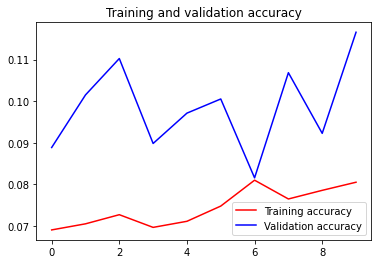

<Figure size 432x288 with 0 Axes>

In [61]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [62]:
import keras

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [ ]:
model.trainable = True
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

epochs = 10
history_fine = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 25,
                    initial_epoch = history.epoch[-1],
                    verbose = 1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 160, 160, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 80, 80, 32)   864         ['rescaling_1[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 80, 80, 32)   128         ['stem_conv[0][0]']        

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
def test_generate(TEST_DIR):
  test_datagen = ImageDataGenerator(
      rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      class_mode='categorical',
                                                      batch_size = 1,
                                                      target_size=(150, 150),
                                                    shuffle = False,
                                                      classes=['.'])
  return test_generator

In [ ]:
test_dir = '/content/sample_data/lulc-tra-val/lulc-classificatio/test'
test_generator = test_generate(test_dir)

In [ ]:
dictionary = {0 : 10, 1 : 11, 2 : 12, 3 : 13, 4 : 14, 5 : 15, 6 : 16, 7 : 17, 8 : 18, 9 : 19, 10 : 1, 11 : 20, 12 : 21, 13 : 22, 14 : 23, 15 : 24, 16 : 25, 17 : 26, 18 : 27, 19 : 28, 20 : 29, 21 : 2, 22 : 3, 23 : 4, 24 : 5, 25 : 6, 26 : 7, 27 : 8, 28 : 9}

In [71]:
predict_proba = model.predict_generator(test_generator)
predict = np.argmax(predict_proba, axis = 1)
predict = np.vectorize(dictionary.get)(predict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [72]:
submission = pd.DataFrame()

filenames = list()
for filename in test_generator.filenames:
  if filename.endswith(".jpg"):
    filenames.append(filename[2:])
submission["id.jpg"] = filenames

submission["label"] = predict

submission.to_csv("/content/submission_EfficientNetV2L_1024dense_1025.csv", index = False)

In [73]:
from google.colab import files
files.download("/content/submission_EfficientNetV2L_1024dense_1025.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You will need to submit this notebook for grading. To download it, click on the `File` tab in the upper left corner of the screen then click on `Download` -> `Download .ipynb`. You can name it anything you want as long as it is a valid `.ipynb` (jupyter notebook) file.

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that leverages a pre-trained network to help you solve the problem of classifying humans from horses.

**Keep it up!**